In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import re #정규표현식
import warnings 
import json
import kss
from konlpy.tag import Okt 
warnings.filterwarnings(action='ignore')

In [2]:
# naver_view_all_data = []
# naver_view_shower= pd.read_csv('cafe_view_data_shower.csv')
# naver_view_all_data.append(naver_view_shower)
# naver_view_recipe= pd.read_csv('cafe_view_data_recipe.csv')
# naver_view_all_data.append(naver_view_recipe)

# naver_view_music_data = pd.concat(naver_view_all_data, axis=0, ignore_index=True)
# naver_view_music_data.to_csv('naver_view_music_all_data.csv',index=False,encoding='utf-8-sig')

In [2]:
df = pd.read_csv('cafe_view_data_alarm.csv', encoding='utf-8-sig', index_col = 0)

In [3]:
df.head()

,tit,body,comment,time,keyword
0,삼성에어드레서 체험단 후기,안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.​유료 체험단 발표 날이 지...,[],2020.06.22. 18:43,가전 알림음
1,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어'),슈베르트 : 피아노 오중주 '송어' & 현악 사중주 '죽음과 소녀'​,"[['송어 회가 급 땡기네요. 크윽. ㅎㅎㅎㅎ'], ['나뻐요~ 나쁜 사냥꾼님\n근...",2021.06.22. 14:22,가전 알림음
2,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,"[['잘 읽고 갑니다 ㅎㅎ 알아두면 좋을것 같네요'], ['삼성세탁기렌탈 잘봤습니다...",2021.11.17. 11:47,가전 알림음
3,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,[],2020.12.07. 04:44,가전 알림음
4,에어컨청소 효과 있는건가요..,눈에 보이는 곰팡이 먼지는 제거했지만청소후에 냄새가 왜이리 많이날까요ㅜ2년째 청소중...,[['청소업체 선정 잘해야해용 싼맛에 하기엔 후에 문제가 더 크더라구요 저도 몇년전...,2021.06.08. 18:35,가전 알림음


In [4]:
print(df.isnull().sum())

tit        0
body       0
comment    0
time       0
keyword    0
dtype: int64


In [5]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 

print(df.isnull().values.any())

False


In [6]:
df['doc'] = df['tit'] + ' ' + df['body'] + ' ' + df['comment']
df

,tit,body,comment,time,keyword,doc
0,삼성에어드레서 체험단 후기,안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.​유료 체험단 발표 날이 지...,[],2020.06.22. 18:43,가전 알림음,삼성에어드레서 체험단 후기 안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다....
1,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어'),슈베르트 : 피아노 오중주 '송어' & 현악 사중주 '죽음과 소녀'​,"[['송어 회가 급 땡기네요. 크윽. ㅎㅎㅎㅎ'], ['나뻐요~ 나쁜 사냥꾼님\n근...",2021.06.22. 14:22,가전 알림음,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어') 슈베르트 :...
2,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,"[['잘 읽고 갑니다 ㅎㅎ 알아두면 좋을것 같네요'], ['삼성세탁기렌탈 잘봤습니다...",2021.11.17. 11:47,가전 알림음,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자! 삼성세탁기렌탈 19...
3,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,[],2020.12.07. 04:44,가전 알림음,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기! 올인원 플렉...
4,에어컨청소 효과 있는건가요..,눈에 보이는 곰팡이 먼지는 제거했지만청소후에 냄새가 왜이리 많이날까요ㅜ2년째 청소중...,[['청소업체 선정 잘해야해용 싼맛에 하기엔 후에 문제가 더 크더라구요 저도 몇년전...,2021.06.08. 18:35,가전 알림음,에어컨청소 효과 있는건가요.. 눈에 보이는 곰팡이 먼지는 제거했지만청소후에 냄새가 ...
...,...,...,...,...,...,...
118,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요~,어렵게 마련한 새집인데 결정할 것이 너무 많아서 힘들었어요.맞벌이라 시간도 많지 않...,[['저도 덕분에 오늘 실측했어요\n식기세척기장 오븐장까지 같이 저렴히 했네요\n감...,2020.10.11. 16:54,가전 알림음,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요~ 어렵게 마련한 새집인데 결정할...
119,삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블),삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블)...,[],2020.07.01. 12:14,가전 알림음,삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블)...
120,A9S 오브제 샀어요,의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배송 받았고요 가격은 ...,"[['녹색?도 이쁘네요 ㅎㅎ 머리카락 배출 안끼고 잘 되시던가요?'], ['네 ㅎㅎ...",2021.03.22. 20:02,가전 알림음,A9S 오브제 샀어요 의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 ...
121,LG 인덕션이 자꾸 꺼져요,2월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인덕션을 켜면 1~2분 내로...,[['저 쓰고있어요. 뭔가를 오래 (특히 9단계에서)끓이거나 할때 알림음 나오면서 ...,2021.05.17. 11:12,가전 알림음,LG 인덕션이 자꾸 꺼져요 2월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 ...


In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [8]:
len(df)

123

In [10]:
df.loc[0, 'doc']

'삼성에어드레서 체험단 후기 안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.\u200b유료 체험단 발표 날이 지나서 마음을 접고 있었던 저에게 갑자기 띠로 링~하고 문자 한 통이 왔습니다.(당첨자 중 이 방문 취소 건이 발생하여 추가 추첨 진행하였습니다)\u200b\u200b완전 대박~~@!@ 순간 장난인가 싶어 매장에 전화해보니 제가 당첨되었다고 이번 주까지 매장 방문하시면 된다고~~ㅎㅎ와~!! 이건 초초초초초초 대박사건이다.일생에 이런 행운이 없던 저에게는 정말 믿기 힘들었어요. ㅋㅋ ㅋ\u200b\u200b\u200b그 다음날, 바로 제가 신청한 매장 삼성디지털플라자 연수 송도점으로 ㄱㄱㅆ~~\u200b빛의 속도로 달려~인천 지하철 원인재역 바로 앞이라 찾기도 쉽고 주차장도 넓어 편했던 거 같아요.2층에는 서비스센터가 있고  1층 가전매장은 넓고 깨끗한 느낌을 주더라고요. \u200b\u200b이제 본론으로...삼성 에어 드레서는 저보다도 저희 남편의 로망 같은 전자제품이었어요.남자의 원픽이라 할까... 모 그런 거 ㅋ ㅋ ㅋ(구체적으로 설명 못해드림)\u200b그리고 이제는 떼려야 뗄 수 없는 미세먼지, 황사 힝 시러~ㅜㅜ여러모로 생활 속 전자제품이 된 거 같아요\u200b그래서 평소에 눈여겨보던 제품이었는데 그런 아이가 저에게로 온다니 다시 한번 말씀드리지만 믿기지가 않아요 홓호호홓 ~\u200b\u200b(소중한 개인 정보)안방에 자리를 잡으셨어요. 호호아.. (좌절ㅜ) 이 퀄리티는 머지ㅋㅋ 저희 집 컨셉을 바꿔야하나~ㅍㅎㅎ크리스탈 미러 너무 고급지잖아~~~제품 전체 내부 샷( 저 사다리처럼 생긴 거 보이시죠? 나중에 알려드릴게요 ^^ )문을 열면 바로 보이는 넓고 튼튼한  고무패킹 보이시나요? 밀폐력 up! 문틈으로 물 샐 걱정은 no~물샐틈없는 제대로 된 안심 설계물이 흘러내리지 않는 내부 바닥 설계와 밖으로 물 샐 걱정 없는 도어 하단 설계여긴 아로마 시트를 넣어서 옷에 향을 책임질 아이가 있고요.바로 아래를 보시면 보푸라기 필터제품 

In [11]:
def clean_str(text): #함수로 정의해둠
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\.]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    #pattern = '[^가-힣 ]'         # 한글만 남기고 특수문자, 숫자, 영문 삭제
    #text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[0-9]'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = 'a-zA-Z'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [12]:
for i in range(len(df)):
    df.doc.iloc[i] = clean_str(df.doc.iloc[i])

In [13]:
df.loc[0, 'doc']

'삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다.유료 체험단 발표 날이 지나서 마음을 접고 있었던 저에게 갑자기 띠로 링하고 문자 한 통이 왔습니다.당첨자 중 이 방문 취소 건이 발생하여 추가 추첨 진행하였습니다완전 대박 순간 장난인가 싶어 매장에 전화해보니 제가 당첨되었다고 이번 주까지 매장 방문하시면 된다고와 이건 초초초초초초 대박사건이다.일생에 이런 행운이 없던 저에게는 정말 믿기 힘들었어요.  그 다음날 바로 제가 신청한 매장 삼성디지털플라자 연수 송도점으로 빛의 속도로 달려인천 지하철 원인재역 바로 앞이라 찾기도 쉽고 주차장도 넓어 편했던 거 같아요.층에는 서비스센터가 있고  층 가전매장은 넓고 깨끗한 느낌을 주더라고요. 이제 본론으로...삼성 에어 드레서는 저보다도 저희 남편의 로망 같은 전자제품이었어요.남자의 원픽이라 할까... 모 그런 거   구체적으로 설명 못해드림그리고 이제는 떼려야 뗄 수 없는 미세먼지 황사 힝 시러여러모로 생활 속 전자제품이 된 거 같아요그래서 평소에 눈여겨보던 제품이었는데 그런 아이가 저에게로 온다니 다시 한번 말씀드리지만 믿기지가 않아요 홓호호홓 소중한 개인 정보안방에 자리를 잡으셨어요. 호호아.. 좌절 이 퀄리티는 머지 저희 집 컨셉을 바꿔야하나크리스탈 미러 너무 고급지잖아제품 전체 내부 샷 저 사다리처럼 생긴 거 보이시죠 나중에 알려드릴게요  문을 열면 바로 보이는 넓고 튼튼한  고무패킹 보이시나요 밀폐력 up 문틈으로 물 샐 걱정은 no물샐틈없는 제대로 된 안심 설계물이 흘러내리지 않는 내부 바닥 설계와 밖으로 물 샐 걱정 없는 도어 하단 설계여긴 아로마 시트를 넣어서 옷에 향을 책임질 아이가 있고요.바로 아래를 보시면 보푸라기 필터제품 정면으로 보이는 미세먼지 필터옷에서 털어낸 먼지가 다시 제품 안에 남아있지 않도록 깔끔하게 제거할 수 있는 기능와 냄새 분해 필터고기 냄새까지 분해해 냄새까지 케어 기능 가 있어요.우리 큰딸의 애착 롱 코트를 넣어도 이렇게나 많이 남다니...말 그

In [14]:
short_df = df[df['doc'].str.len().lt(3000)]
short_df.reset_index()
short_df

,tit,body,comment,time,keyword,doc
0,삼성에어드레서 체험단 후기,안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.​유료 체험단 발표 날이 지...,[],2020.06.22. 18:43,가전 알림음,삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다.유...
1,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어'),슈베르트 : 피아노 오중주 '송어' & 현악 사중주 '죽음과 소녀'​,"[['송어 회가 급 땡기네요. 크윽. ㅎㅎㅎㅎ'], ['나뻐요~ 나쁜 사냥꾼님\n근...",2021.06.22. 14:22,가전 알림음,월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...
2,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,"[['잘 읽고 갑니다 ㅎㅎ 알아두면 좋을것 같네요'], ['삼성세탁기렌탈 잘봤습니다...",2021.11.17. 11:47,가전 알림음,삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후면...
3,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,[],2020.12.07. 04:44,가전 알림음,올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스쿡...
5,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블 ※ 삼성 플렉스워시...,[],2020.07.01. 12:09,가전 알림음,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내 ...
...,...,...,...,...,...,...
118,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요~,어렵게 마련한 새집인데 결정할 것이 너무 많아서 힘들었어요.맞벌이라 시간도 많지 않...,[['저도 덕분에 오늘 실측했어요\n식기세척기장 오븐장까지 같이 저렴히 했네요\n감...,2020.10.11. 16:54,가전 알림음,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요 어렵게 마련한 새집인데 결정할 ...
119,삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블),삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블)...,[],2020.07.01. 12:14,가전 알림음,삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데A...
120,A9S 오브제 샀어요,의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배송 받았고요 가격은 ...,"[['녹색?도 이쁘네요 ㅎㅎ 머리카락 배출 안끼고 잘 되시던가요?'], ['네 ㅎㅎ...",2021.03.22. 20:02,가전 알림음,AS 오브제 샀어요 의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배...
121,LG 인덕션이 자꾸 꺼져요,2월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인덕션을 켜면 1~2분 내로...,[['저 쓰고있어요. 뭔가를 오래 (특히 9단계에서)끓이거나 할때 알림음 나오면서 ...,2021.05.17. 11:12,가전 알림음,LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인...


In [15]:
short_df.to_csv('cafe_view_data_alarm_short.csv',index=False, encoding='utf-8-sig')

In [16]:
#short_df_500 = df.iloc[:500, :]

In [17]:
def split_sent(docu):
    try:
        #s_sent = kss.split_sentences(docu, num_workers=1)
        s_sent = kss.split_sentences(docu)
    except Exception as e:
        print('kss exception occurred: {}'.format(e))
        return ""
    return s_sent

In [18]:
from tqdm import tqdm

tqdm.pandas()
short_df['doc_n'] = short_df['doc'].progress_apply(lambda x: split_sent(x))

 33%|██████████████████████████▋                                                      | 34/103 [02:30<05:04,  4.42s/it]

kss exception occurred: 'NoneType' object has no attribute 'do_analysis'


 86%|█████████████████████████████████████████████████████████████████████▉           | 89/103 [05:29<00:35,  2.55s/it]

kss exception occurred: 'NoneType' object has no attribute 'do_analysis'


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [06:32<00:00,  3.81s/it]


In [20]:
naver_view_all_split_data = short_df

In [21]:
naver_view_all_split_data

,tit,body,comment,time,keyword,doc,doc_n
0,삼성에어드레서 체험단 후기,안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.​유료 체험단 발표 날이 지...,[],2020.06.22. 18:43,가전 알림음,삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다.유...,"[삼성에어드레서 체험단 후기 안녕하세요, 체험단에 막차를 간신히 탄 미소 수빈입니다..."
1,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어'),슈베르트 : 피아노 오중주 '송어' & 현악 사중주 '죽음과 소녀'​,"[['송어 회가 급 땡기네요. 크윽. ㅎㅎㅎㅎ'], ['나뻐요~ 나쁜 사냥꾼님\n근...",2021.06.22. 14:22,가전 알림음,월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...,[월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 송...
2,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,"[['잘 읽고 갑니다 ㅎㅎ 알아두면 좋을것 같네요'], ['삼성세탁기렌탈 잘봤습니다...",2021.11.17. 11:47,가전 알림음,삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후면...,[삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후...
3,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,[],2020.12.07. 04:44,가전 알림음,올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스쿡...,[올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스...
5,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블 ※ 삼성 플렉스워시...,[],2020.07.01. 12:09,가전 알림음,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내 ...,[삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내...
...,...,...,...,...,...,...,...
118,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요~,어렵게 마련한 새집인데 결정할 것이 너무 많아서 힘들었어요.맞벌이라 시간도 많지 않...,[['저도 덕분에 오늘 실측했어요\n식기세척기장 오븐장까지 같이 저렴히 했네요\n감...,2020.10.11. 16:54,가전 알림음,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요 어렵게 마련한 새집인데 결정할 ...,"[문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요, 어렵게 마련한 새집인데 결정..."
119,삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블),삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블)...,[],2020.07.01. 12:14,가전 알림음,삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데A...,[삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데...
120,A9S 오브제 샀어요,의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배송 받았고요 가격은 ...,"[['녹색?도 이쁘네요 ㅎㅎ 머리카락 배출 안끼고 잘 되시던가요?'], ['네 ㅎㅎ...",2021.03.22. 20:02,가전 알림음,AS 오브제 샀어요 의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배...,"[AS 오브제 샀어요, 의외로 스사사에 후기가 없길래..., 올려봅니다저번 주 토요..."
121,LG 인덕션이 자꾸 꺼져요,2월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인덕션을 켜면 1~2분 내로...,[['저 쓰고있어요. 뭔가를 오래 (특히 9단계에서)끓이거나 할때 알림음 나오면서 ...,2021.05.17. 11:12,가전 알림음,LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인...,"[LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요, 사용초기부터 처..."


In [22]:
naver_view_all_split_data.to_csv('naver_view_alarm_split_data.csv',index=False, encoding='utf-8-sig')

In [23]:
df = pd.read_csv('naver_view_alarm_split_data.csv', encoding='utf-8-sig')

In [24]:
print(df.isnull().sum())

tit        0
body       0
comment    0
time       0
keyword    0
doc        0
doc_n      2
dtype: int64


In [25]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 
df['doc'] = df['doc'].fillna('') 
df['doc_n'] = df['doc_n'].fillna('') 

In [26]:
print(df.isnull().values.any())

False


In [27]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [28]:
len(df)

103

In [29]:
df['doc_n']

0      ['삼성에어드레서 체험단 후기 안녕하세요', '체험단에 막차를 간신히 탄 미소 수빈...
1      ['월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...
2      ['삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg ...
3      ['올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉...
4      ['삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안...
                             ...                        
98     ['문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요', '어렵게 마련한 새집인데...
99     ['삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑...
100    ['AS 오브제 샀어요', '의외로 스사사에 후기가 없길래...', '올려봅니다저번...
101    ['LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요', '사용초기부...
102    ['쿠첸 플렉스쿡으로 슈렉소세지 아기반찬 만들기 쿠첸 플렉스쿡으로 슈렉소세지 아기반...
Name: doc_n, Length: 103, dtype: object

In [30]:
eval(df.loc[0, 'doc_n'])

['삼성에어드레서 체험단 후기 안녕하세요',
 '체험단에 막차를 간신히 탄 미소 수빈입니다.',
 '유료 체험단 발표 날이 지나서 마음을 접고 있었던 저에게 갑자기 띠로 링하고 문자 한 통이 왔습니다.',
 '당첨자 중 이 방문 취소 건이 발생하여 추가 추첨 진행하였습니다',
 '완전 대박 순간 장난인가 싶어 매장에 전화해보니 제가 당첨되었다고 이번 주까지 매장 방문하시면 된다고와 이건 초초초초초초 대박사건이다.',
 '일생에 이런 행운이 없던 저에게는 정말 믿기 힘들었어요.',
 '그 다음날 바로 제가 신청한 매장 삼성디지털플라자 연수 송도점으로 빛의 속도로 달려인천 지하철 원인재역 바로 앞이라 찾기도 쉽고 주차장도 넓어 편했던 거 같아요.',
 '층에는 서비스센터가 있고 층 가전매장은 넓고 깨끗한 느낌을 주더라고요.',
 '이제 본론으로...삼성 에어 드레서는 저보다도 저희 남편의 로망 같은 전자제품이었어요.',
 '남자의 원픽이라 할까...',
 '모 그런 거 구체적으로 설명 못해드림그리고 이제는 떼려야 뗄 수 없는 미세먼지 황사 힝 시러여러모로 생활 속 전자제품이 된 거 같아요',
 '그래서 평소에 눈여겨보던 제품이었는데 그런 아이가 저에게로 온다니 다시 한번 말씀드리지만 믿기지가 않아요',
 '홓호호홓 소중한 개인 정보안방에 자리를 잡으셨어요.',
 '호호아.. 좌절 이 퀄리티는 머지 저희 집 컨셉을 바꿔야하나크리스탈 미러 너무 고급지잖아제품 전체 내부 샷 저 사다리처럼 생긴 거 보이시죠 나중에 알려드릴게요 문을 열면 바로 보이는 넓고 튼튼한 고무패킹 보이시나요',
 '밀폐력 up 문틈으로 물 샐 걱정은 no물샐틈없는 제대로 된 안심 설계물이 흘러내리지 않는 내부 바닥 설계와 밖으로 물 샐 걱정 없는 도어 하단 설계여긴 아로마 시트를 넣어서 옷에 향을 책임질 아이가 있고요.',
 '바로 아래를 보시면 보푸라기 필터제품 정면으로 보이는 미세먼지 필터옷에서 털어낸 먼지가 다시 제품 안에 남아있지 않도록 깔끔하게 제거할 수 있는 기능와 냄새 분해 필터고기 

In [31]:
df['doc_n']

0      ['삼성에어드레서 체험단 후기 안녕하세요', '체험단에 막차를 간신히 탄 미소 수빈...
1      ['월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...
2      ['삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg ...
3      ['올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉...
4      ['삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안...
                             ...                        
98     ['문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요', '어렵게 마련한 새집인데...
99     ['삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑...
100    ['AS 오브제 샀어요', '의외로 스사사에 후기가 없길래...', '올려봅니다저번...
101    ['LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요', '사용초기부...
102    ['쿠첸 플렉스쿡으로 슈렉소세지 아기반찬 만들기 쿠첸 플렉스쿡으로 슈렉소세지 아기반...
Name: doc_n, Length: 103, dtype: object

In [32]:
df['doc_n'].str.contains(r"\]").sum()

101

In [33]:
loop_cnt = 0

In [34]:

def merge_into_one_sentence(sent_list):
    try:
        sent_str = ", ".join(sent_list)
        sent_str = "[" + sent_str[0:]
        sent_str = sent_str + ']'
    except SyntaxError as e:
        print("merge error {}".format(e))
        return ""
    return sent_str

In [39]:
for idx, member in df.iterrows():
    #print(idx)
    if 32 == idx or 87 == idx:
        continue
    df.loc[idx, 'doc_n_str'] = merge_into_one_sentence(eval(df.loc[idx, 'doc_n']))

In [40]:
print(df.isnull().sum())

tit          0
body         0
comment      0
time         0
keyword      0
doc          0
doc_n        0
doc_n_str    2
dtype: int64


In [41]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 
df['doc'] = df['doc'].fillna('') 
df['doc_n'] = df['doc_n'].fillna('') 
df['doc_n_str'] = df['doc_n_str'].fillna('') 

In [42]:
print(df.isnull().values.any())

False


In [43]:
df

,tit,body,comment,time,keyword,doc,doc_n,doc_n_str
0,삼성에어드레서 체험단 후기,안녕하세요~ 체험단에 막차를 간신히 탄 미소 수빈입니다.​유료 체험단 발표 날이 지...,[],2020.06.22. 18:43,가전 알림음,삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다.유...,"['삼성에어드레서 체험단 후기 안녕하세요', '체험단에 막차를 간신히 탄 미소 수빈...","[삼성에어드레서 체험단 후기 안녕하세요, 체험단에 막차를 간신히 탄 미소 수빈입니다..."
1,6월 22일 클래식 CD 개봉기 (슈베르트 : 피아노 오중주 '송어'),슈베르트 : 피아노 오중주 '송어' & 현악 사중주 '죽음과 소녀'​,"[['송어 회가 급 땡기네요. 크윽. ㅎㅎㅎㅎ'], ['나뻐요~ 나쁜 사냥꾼님\n근...",2021.06.22. 14:22,가전 알림음,월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...,['월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...,[월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 송...
2,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,삼성세탁기렌탈 19kg 후면컨트롤로 더 편리하게 세탁물 꺼내자!,"[['잘 읽고 갑니다 ㅎㅎ 알아두면 좋을것 같네요'], ['삼성세탁기렌탈 잘봤습니다...",2021.11.17. 11:47,가전 알림음,삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후면...,['삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg ...,[삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후...
3,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,올인원 플렉스쿡이 만들어준 버터커리치킨! 간단하게 쪽파김치양념 만들기!,[],2020.12.07. 04:44,가전 알림음,올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스쿡...,['올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉...,[올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스...
4,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프4더블 ※ 삼성 플렉스워시...,[],2020.07.01. 12:09,가전 알림음,삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내 ...,['삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안...,[삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내...
...,...,...,...,...,...,...,...,...
98,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요~,어렵게 마련한 새집인데 결정할 것이 너무 많아서 힘들었어요.맞벌이라 시간도 많지 않...,[['저도 덕분에 오늘 실측했어요\n식기세척기장 오븐장까지 같이 저렴히 했네요\n감...,2020.10.11. 16:54,가전 알림음,문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요 어렵게 마련한 새집인데 결정할 ...,"['문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요', '어렵게 마련한 새집인데...","[문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요, 어렵게 마련한 새집인데 결정..."
99,삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블),삼성그랑데AI건조기키트SET(16KG) 지원가전스펙(대명아임레디 스페셜라이프4더블)...,[],2020.07.01. 12:14,가전 알림음,삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데A...,['삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑...,[삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데...
100,A9S 오브제 샀어요,의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배송 받았고요 가격은 ...,"[['녹색?도 이쁘네요 ㅎㅎ 머리카락 배출 안끼고 잘 되시던가요?'], ['네 ㅎㅎ...",2021.03.22. 20:02,가전 알림음,AS 오브제 샀어요 의외로 스사사에 후기가 없길래...올려봅니다저번 주 토요일에 배...,"['AS 오브제 샀어요', '의외로 스사사에 후기가 없길래...', '올려봅니다저번...","[AS 오브제 샀어요, 의외로 스사사에 후기가 없길래..., 올려봅니다저번 주 토요..."
101,LG 인덕션이 자꾸 꺼져요,2월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인덕션을 켜면 1~2분 내로...,[['저 쓰고있어요. 뭔가를 오래 (특히 9단계에서)끓이거나 할때 알림음 나오면서 ...,2021.05.17. 11:12,가전 알림음,LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요사용초기부터 처음 인...,"['LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요', '사용초기부...","[LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요, 사용초기부터 처..."


In [44]:
def remove_num(sent):
    p=re.compile("[0-9]+")    
    return p.sub(" ", sent)

In [45]:
df['doc_n_str']=df['doc_n_str'].apply(lambda x: remove_num(x))

In [46]:
df['doc_n_str']

0      [삼성에어드레서 체험단 후기 안녕하세요, 체험단에 막차를 간신히 탄 미소 수빈입니다...
1      [월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 송...
2      [삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg 후...
3      [올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉스...
4      [삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안내...
                             ...                        
98     [문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요, 어렵게 마련한 새집인데 결정...
99     [삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑데...
100    [AS 오브제 샀어요, 의외로 스사사에 후기가 없길래..., 올려봅니다저번 주 토요...
101    [LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요, 사용초기부터 처...
102    [쿠첸 플렉스쿡으로 슈렉소세지 아기반찬 만들기 쿠첸 플렉스쿡으로 슈렉소세지 아기반찬...
Name: doc_n_str, Length: 103, dtype: object

In [47]:
def remove_punc(sent):
    sentence_list = []    
    p = re.compile("\W+")
    sentence_list.append(p.sub(" ", sent))
    return sentence_list

df['doc_n_str'] = df['doc_n_str'].apply(lambda x: remove_punc(x))

In [48]:
df['doc_n_str']

0      [ 삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다...
1      [ 월 일 클래식 CD 개봉기 슈베르트 피아노 오중주 송어 슈베르트 피아노 오중주 ...
2      [ 삼성세탁기렌탈 kg 후면컨트롤로 더 편리하게 세탁물 꺼내자 삼성세탁기렌탈 kg ...
3      [ 올인원 플렉스쿡이 만들어준 버터커리치킨 간단하게 쪽파김치양념 만들기 올인원 플렉...
4      [ 삼성플랙스워시 가전스펙안내 대명아임레디 스페셜라이프더블 삼성플랙스워시 가전스펙안...
                             ...                        
98     [ 문의 많으셨던 냉장고장과 식세기장 가전도 완성했어요 어렵게 마련한 새집인데 결정...
99     [ 삼성그랑데AI건조기키트SETKG 지원가전스펙대명아임레디 스페셜라이프더블 삼성그랑...
100    [ AS 오브제 샀어요 의외로 스사사에 후기가 없길래 올려봅니다저번 주 토요일에 배...
101    [ LG 인덕션이 자꾸 꺼져요 월에 엘지인덕션을 구입해서 사용했어요 사용초기부터 처...
102    [ 쿠첸 플렉스쿡으로 슈렉소세지 아기반찬 만들기 쿠첸 플렉스쿡으로 슈렉소세지 아기반...
Name: doc_n_str, Length: 103, dtype: object

In [49]:
df.loc[0, 'doc_n_str']

[' 삼성에어드레서 체험단 후기 안녕하세요 체험단에 막차를 간신히 탄 미소 수빈입니다 유료 체험단 발표 날이 지나서 마음을 접고 있었던 저에게 갑자기 띠로 링하고 문자 한 통이 왔습니다 당첨자 중 이 방문 취소 건이 발생하여 추가 추첨 진행하였습니다 완전 대박 순간 장난인가 싶어 매장에 전화해보니 제가 당첨되었다고 이번 주까지 매장 방문하시면 된다고와 이건 초초초초초초 대박사건이다 일생에 이런 행운이 없던 저에게는 정말 믿기 힘들었어요 그 다음날 바로 제가 신청한 매장 삼성디지털플라자 연수 송도점으로 빛의 속도로 달려인천 지하철 원인재역 바로 앞이라 찾기도 쉽고 주차장도 넓어 편했던 거 같아요 층에는 서비스센터가 있고 층 가전매장은 넓고 깨끗한 느낌을 주더라고요 이제 본론으로 삼성 에어 드레서는 저보다도 저희 남편의 로망 같은 전자제품이었어요 남자의 원픽이라 할까 모 그런 거 구체적으로 설명 못해드림그리고 이제는 떼려야 뗄 수 없는 미세먼지 황사 힝 시러여러모로 생활 속 전자제품이 된 거 같아요 그래서 평소에 눈여겨보던 제품이었는데 그런 아이가 저에게로 온다니 다시 한번 말씀드리지만 믿기지가 않아요 홓호호홓 소중한 개인 정보안방에 자리를 잡으셨어요 호호아 좌절 이 퀄리티는 머지 저희 집 컨셉을 바꿔야하나크리스탈 미러 너무 고급지잖아제품 전체 내부 샷 저 사다리처럼 생긴 거 보이시죠 나중에 알려드릴게요 문을 열면 바로 보이는 넓고 튼튼한 고무패킹 보이시나요 밀폐력 up 문틈으로 물 샐 걱정은 no물샐틈없는 제대로 된 안심 설계물이 흘러내리지 않는 내부 바닥 설계와 밖으로 물 샐 걱정 없는 도어 하단 설계여긴 아로마 시트를 넣어서 옷에 향을 책임질 아이가 있고요 바로 아래를 보시면 보푸라기 필터제품 정면으로 보이는 미세먼지 필터옷에서 털어낸 먼지가 다시 제품 안에 남아있지 않도록 깔끔하게 제거할 수 있는 기능와 냄새 분해 필터고기 냄새까지 분해해 냄새까지 케어 기능 가 있어요 우리 큰딸의 애착 롱 코트를 넣어도 이렇게나 많이 남다 니 말 그대로 긴 옷 케어존이네여

In [50]:
# 명사만 추출
from konlpy.tag import Okt  
okt=Okt()  

def noun_selection(sent_list):    
    sent_tokens=[]
    for sentence in sent_list:
        sent_tokens.append(okt.nouns(sentence))
    return(sent_tokens)

#nouns = noun_selection(df.loc[0, 'doc_n_str'])
df['doc_n_str_nouns'] = df['doc_n_str'].apply(lambda x: noun_selection(x))

In [51]:
df['doc_n_str_nouns']

0      [[삼성, 에어, 드레서, 체험, 단, 후기, 체험, 단, 막차, 미소, 수빈, 유...
1      [[월, 일, 클래식, 개봉, 기, 슈베르트, 피아노, 중주, 송어, 슈베르트, 피...
2      [[삼성, 세탁기, 렌탈, 후, 컨트롤, 더, 세탁물, 삼성, 세탁기, 렌탈, 후,...
3      [[올인원, 플렉스, 쿡, 준, 버터, 커리, 치킨, 쪽파, 김치, 양념, 만들기,...
4      [[삼성, 플랙스, 워시, 가전, 스펙, 안내, 대명, 임, 레디, 스페셜, 라이프...
                             ...                        
98     [[문의, 냉장고, 식, 세기, 가전, 완성, 마련, 새집, 결정, 것, 맞벌이, ...
99     [[그, 데, 건조기, 키트, 지원, 스펙, 대명, 임, 레디, 스페셜, 라이프, ...
100    [[오브, 제, 스사사, 후기, 저번, 주, 토요일, 배송, 가격, 만원, 초반, ...
101    [[인덕션, 자꾸, 월, 엘지, 인덕션, 구입, 사용, 사용, 초기, 처음, 인덕션...
102    [[쿠첸, 플렉스, 쿡, 슈렉, 소세지, 아기, 반찬, 만들기, 쿠첸, 플렉스, 쿡...
Name: doc_n_str_nouns, Length: 103, dtype: object

In [53]:
with open('korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)

stopwords.extend(['안','수','거','왜','것','후','에서','고','이다','는','한','안녕','형','안녕하다','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요'])

In [54]:
def rem_n_stopwords(sent_list):
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

In [55]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: rem_n_stopwords(x))

In [56]:
df['doc_n_str_nouns']

0      [[삼성, 에어, 드레서, 체험, 단, 후기, 체험, 단, 막차, 미소, 수빈, 유...
1      [[클래식, 개봉, 기, 슈베르트, 피아노, 중주, 송어, 슈베르트, 피아노, 중주...
2      [[삼성, 세탁기, 렌탈, 컨트롤, 더, 세탁물, 삼성, 세탁기, 렌탈, 컨트롤, ...
3      [[올인원, 플렉스, 쿡, 준, 버터, 커리, 치킨, 쪽파, 김치, 양념, 만들기,...
4      [[삼성, 플랙스, 워시, 가전, 스펙, 안내, 대명, 임, 레디, 스페셜, 라이프...
                             ...                        
98     [[문의, 냉장고, 식, 세기, 가전, 완성, 마련, 새집, 결정, 맞벌이, 발품,...
99     [[건조기, 키트, 지원, 스펙, 대명, 임, 레디, 스페셜, 라이프, 더블, 건조...
100    [[오브, 스사사, 후기, 저번, 주, 토요일, 배송, 가격, 만원, 초반, 집, ...
101    [[인덕션, 자꾸, 엘지, 인덕션, 구입, 사용, 사용, 초기, 처음, 인덕션, 분...
102    [[쿠첸, 플렉스, 쿡, 슈렉, 소세지, 아기, 반찬, 만들기, 쿠첸, 플렉스, 쿡...
Name: doc_n_str_nouns, Length: 103, dtype: object

In [57]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

In [58]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: one_word_list(x))

In [59]:
df['doc_n_str_nouns']

0      [삼성, 에어, 드레서, 체험, 단, 후기, 체험, 단, 막차, 미소, 수빈, 유료...
1      [클래식, 개봉, 기, 슈베르트, 피아노, 중주, 송어, 슈베르트, 피아노, 중주,...
2      [삼성, 세탁기, 렌탈, 컨트롤, 더, 세탁물, 삼성, 세탁기, 렌탈, 컨트롤, 더...
3      [올인원, 플렉스, 쿡, 준, 버터, 커리, 치킨, 쪽파, 김치, 양념, 만들기, ...
4      [삼성, 플랙스, 워시, 가전, 스펙, 안내, 대명, 임, 레디, 스페셜, 라이프,...
                             ...                        
98     [문의, 냉장고, 식, 세기, 가전, 완성, 마련, 새집, 결정, 맞벌이, 발품, ...
99     [건조기, 키트, 지원, 스펙, 대명, 임, 레디, 스페셜, 라이프, 더블, 건조기...
100    [오브, 스사사, 후기, 저번, 주, 토요일, 배송, 가격, 만원, 초반, 집, 무...
101    [인덕션, 자꾸, 엘지, 인덕션, 구입, 사용, 사용, 초기, 처음, 인덕션, 분,...
102    [쿠첸, 플렉스, 쿡, 슈렉, 소세지, 아기, 반찬, 만들기, 쿠첸, 플렉스, 쿡,...
Name: doc_n_str_nouns, Length: 103, dtype: object

In [60]:
df['doc_n_str_nouns_one_word_list'] = df['doc_n_str_nouns']

In [61]:
#df['doc_n_str_nouns_one_word_list']

In [55]:
#df.to_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [62]:
total_word=[]
for i in range(len(df)):
    total_word.extend(df.loc[i,'doc_n_str_nouns'])

pd.Series(total_word).value_counts().head(15)

삼성       210
사용       176
건조기      155
냉장고      139
가전       138
기능       112
제품       106
공기청정기     95
에어        86
엘지        85
분         80
라이프       76
설정        76
안마        74
세탁기       73
dtype: int64

<AxesSubplot:>

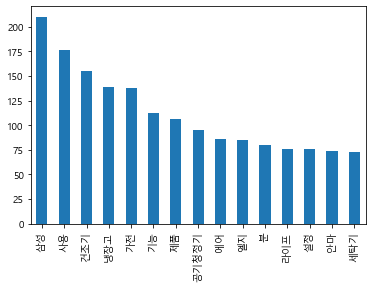

In [63]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

In [64]:
df['doc_n_str_nouns_str'] = df['doc_n_str_nouns'].apply(lambda x: " ".join(x))

In [65]:
df['doc_n_str_nouns_str']

0      삼성 에어 드레서 체험 단 후기 체험 단 막차 미소 수빈 유료 체험 단 발표 날 마...
1      클래식 개봉 기 슈베르트 피아노 중주 송어 슈베르트 피아노 중주 송어 현악 사중주 ...
2      삼성 세탁기 렌탈 컨트롤 더 세탁물 삼성 세탁기 렌탈 컨트롤 더 세탁물 알 아두 삼...
3      올인원 플렉스 쿡 준 버터 커리 치킨 쪽파 김치 양념 만들기 올인원 플렉스 쿡 준 ...
4      삼성 플랙스 워시 가전 스펙 안내 대명 임 레디 스페셜 라이프 더블 삼성 플랙스 워...
                             ...                        
98     문의 냉장고 식 세기 가전 완성 마련 새집 결정 맞벌이 발품 기도 본인 집 진심 시...
99     건조기 키트 지원 스펙 대명 임 레디 스페셜 라이프 더블 건조기 키트 지원 스펙 대...
100    오브 스사사 후기 저번 주 토요일 배송 가격 만원 초반 집 무선 청소기 갑자기 자동...
101    인덕션 자꾸 엘지 인덕션 구입 사용 사용 초기 처음 인덕션 분 내 소리 인덕션 화구...
102    쿠첸 플렉스 쿡 슈렉 소세지 아기 반찬 만들기 쿠첸 플렉스 쿡 슈렉 소세지 아기 반...
Name: doc_n_str_nouns_str, Length: 103, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
count_dtm = vector.fit_transform(df['doc_n_str_nouns_str']).toarray() 
print(count_dtm.shape)
print(vector.vocabulary_)

(103, 3072)
{'삼성': 1285, '에어': 1791, '드레서': 642, '체험': 2565, '후기': 3043, '막차': 784, '미소': 942, '수빈': 1466, '유료': 2004, '발표': 998, '마음': 773, '갑자기': 69, '문자': 914, '당첨': 528, '방문': 1010, '취소': 2619, '발생': 994, '추가': 2599, '추첨': 2603, '진행': 2493, '완전': 1905, '대박': 542, '순간': 1479, '장난': 2205, '매장': 821, '전화': 2282, '이건': 2054, '초초초초초초': 2581, '사건': 1234, '일생': 2145, '행운': 2950, '정말': 2310, '신청': 1601, '디지털플라자': 663, '연수': 1826, '송도': 1442, '속도': 1430, '인천': 2124, '지하철': 2471, '원인재역': 1969, '찾기': 2531, '주차장': 2409, '서비스': 1334, '센터': 1394, '가전': 36, '느낌': 476, '이제': 2098, '본론': 1128, '남편': 414, '로망': 727, '전자제품': 2276, '남자': 413, '원픽': 1974, '구체': 268, '설명': 1351, '미세먼지': 940, '황사': 3029, '모로': 865, '생활': 1325, '평소': 2819, '제품': 2351, '다시': 489, '한번': 2905, '홓호호홓': 2998, '개인': 87, '정보': 2314, '안방': 1689, '자리': 2178, '호호': 2984, '좌절': 2383, '퀄리티': 2696, '컨셉': 2660, '크리스탈': 2699, '미러': 935, '고급': 168, '전체': 2278, '내부': 420, '사다리': 1240, '보이시': 1111, '나중': 402, '고무': 174, '패킹': 2800, '밀폐': 9

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(df['doc_n_str_nouns_str'])
tfidv_dtm = tfidfv.transform(df['doc_n_str_nouns_str']).toarray()
print(tfidv_dtm.shape)
print(tfidfv.vocabulary_)

(103, 3072)
{'삼성': 1285, '에어': 1791, '드레서': 642, '체험': 2565, '후기': 3043, '막차': 784, '미소': 942, '수빈': 1466, '유료': 2004, '발표': 998, '마음': 773, '갑자기': 69, '문자': 914, '당첨': 528, '방문': 1010, '취소': 2619, '발생': 994, '추가': 2599, '추첨': 2603, '진행': 2493, '완전': 1905, '대박': 542, '순간': 1479, '장난': 2205, '매장': 821, '전화': 2282, '이건': 2054, '초초초초초초': 2581, '사건': 1234, '일생': 2145, '행운': 2950, '정말': 2310, '신청': 1601, '디지털플라자': 663, '연수': 1826, '송도': 1442, '속도': 1430, '인천': 2124, '지하철': 2471, '원인재역': 1969, '찾기': 2531, '주차장': 2409, '서비스': 1334, '센터': 1394, '가전': 36, '느낌': 476, '이제': 2098, '본론': 1128, '남편': 414, '로망': 727, '전자제품': 2276, '남자': 413, '원픽': 1974, '구체': 268, '설명': 1351, '미세먼지': 940, '황사': 3029, '모로': 865, '생활': 1325, '평소': 2819, '제품': 2351, '다시': 489, '한번': 2905, '홓호호홓': 2998, '개인': 87, '정보': 2314, '안방': 1689, '자리': 2178, '호호': 2984, '좌절': 2383, '퀄리티': 2696, '컨셉': 2660, '크리스탈': 2699, '미러': 935, '고급': 168, '전체': 2278, '내부': 420, '사다리': 1240, '보이시': 1111, '나중': 402, '고무': 174, '패킹': 2800, '밀폐': 9

In [68]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns'])
print(dictionary)

Dictionary(3458 unique tokens: ['가이드', '가전', '갑자기', '개인', '걱정']...)


In [69]:
print(dictionary.doc2bow(df.loc[0,'doc_n_str_nouns']))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 2), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 4), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 1), (85, 1), (86, 4), (87, 2), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [70]:
corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns']]

print(corpus[0])

for i in range(5):
    print(dictionary[i])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 2), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 4), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 1), (85, 1), (86, 4), (87, 2), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [71]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,30):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda =CoherenceModel(model=ldamodel, texts=df['doc_n_str_nouns'], dictionary = dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number o

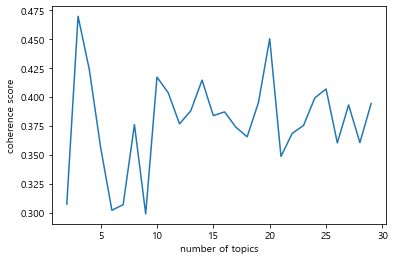

In [72]:
x=range(2,30)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show() 

In [73]:
import gensim
import matplotlib.pyplot as plt

NUM_TOPICS = 3 #3개의 토픽, k=3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
print(topics)

[(0, '0.009*"사용" + 0.008*"제품" + 0.008*"소리" + 0.007*"가전"'), (1, '0.022*"삼성" + 0.012*"냉장고" + 0.012*"건조기" + 0.012*"공기청정기"'), (2, '0.011*"설정" + 0.010*"사용" + 0.009*"화면" + 0.007*"기능"')]


In [74]:
for topic in topics:
    print(topic)

(0, '0.009*"사용" + 0.008*"제품" + 0.008*"소리" + 0.007*"가전"')
(1, '0.022*"삼성" + 0.012*"냉장고" + 0.012*"건조기" + 0.012*"공기청정기"')
(2, '0.011*"설정" + 0.010*"사용" + 0.009*"화면" + 0.007*"기능"')


In [75]:
for topic in ldamodel.print_topics():
    print(topic)

(0, '0.009*"사용" + 0.008*"제품" + 0.008*"소리" + 0.007*"가전" + 0.007*"더" + 0.007*"에어" + 0.006*"기능" + 0.006*"냉장고" + 0.006*"안마" + 0.006*"히터"')
(1, '0.022*"삼성" + 0.012*"냉장고" + 0.012*"건조기" + 0.012*"공기청정기" + 0.009*"라이프" + 0.009*"인치" + 0.009*"노트북" + 0.009*"스페셜" + 0.008*"가전" + 0.007*"정보"')
(2, '0.011*"설정" + 0.010*"사용" + 0.009*"화면" + 0.007*"기능" + 0.007*"버튼" + 0.006*"분" + 0.006*"제품" + 0.006*"가전" + 0.005*"조리" + 0.005*"건조기"')


In [76]:
#df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [77]:
df['doc_n_str_nouns_one_word_list']

0      [삼성, 에어, 드레서, 체험, 단, 후기, 체험, 단, 막차, 미소, 수빈, 유료...
1      [클래식, 개봉, 기, 슈베르트, 피아노, 중주, 송어, 슈베르트, 피아노, 중주,...
2      [삼성, 세탁기, 렌탈, 컨트롤, 더, 세탁물, 삼성, 세탁기, 렌탈, 컨트롤, 더...
3      [올인원, 플렉스, 쿡, 준, 버터, 커리, 치킨, 쪽파, 김치, 양념, 만들기, ...
4      [삼성, 플랙스, 워시, 가전, 스펙, 안내, 대명, 임, 레디, 스페셜, 라이프,...
                             ...                        
98     [문의, 냉장고, 식, 세기, 가전, 완성, 마련, 새집, 결정, 맞벌이, 발품, ...
99     [건조기, 키트, 지원, 스펙, 대명, 임, 레디, 스페셜, 라이프, 더블, 건조기...
100    [오브, 스사사, 후기, 저번, 주, 토요일, 배송, 가격, 만원, 초반, 집, 무...
101    [인덕션, 자꾸, 엘지, 인덕션, 구입, 사용, 사용, 초기, 처음, 인덕션, 분,...
102    [쿠첸, 플렉스, 쿡, 슈렉, 소세지, 아기, 반찬, 만들기, 쿠첸, 플렉스, 쿡,...
Name: doc_n_str_nouns_one_word_list, Length: 103, dtype: object

In [78]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

Dictionary(3458 unique tokens: ['가이드', '가전', '갑자기', '개인', '걱정']...)


In [79]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns_one_word_list']]

NUM_TOPICS = 3 #3개의 토픽, k=3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

Dictionary(3458 unique tokens: ['가이드', '가전', '갑자기', '개인', '걱정']...)


In [80]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
prepared_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.148653 -0.002962       1        1  46.703594
1      0.077505 -0.102404       2        1  27.269903
0      0.071148  0.105366       3        1  26.026503, topic_info=       Term        Freq       Total Category  logprob  loglift
2014     화면   43.000000   43.000000  Default  30.0000  30.0000
365   공기청정기   83.000000   83.000000  Default  29.0000  29.0000
92       설정   61.000000   61.000000  Default  28.0000  28.0000
2024     쪽지   37.000000   37.000000  Default  27.0000  27.0000
86       삼성  182.000000  182.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
358     건조기   18.422007  131.807262   Topic3  -5.4876  -0.6217
246       분   15.551711   66.788258   Topic3  -5.6570  -0.1113
1274    인덕션   14.831219   59.502324   Topic3  -5.7045  -0.0432
562      설치   14.662075   60.669967   Topic3  -5.7159  -0.0741
479      의자   13.672084   44.881161   Topic3  -5.7858   0.1574

[201 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2545      3  0.985184   가습기
1         1  0.605388    가전
1         2  0.230218    가전
1         3  0.162005    가전
3039      2  0.900974    거래
...     ...       ...   ...
1349      3  0.884991  홈페이지
2014      2  0.046105    화면
2014      3  0.945150    화면
2333      1  0.975414    히터
2084      3  0.948958    힐링

[266 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [81]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/'
cloud = WordCloud(font_path=font_path+'gulim.ttc', width=800, height=600).generate(" ".join(df['doc_n_str_nouns_str']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 799.5, 599.5, -0.5)

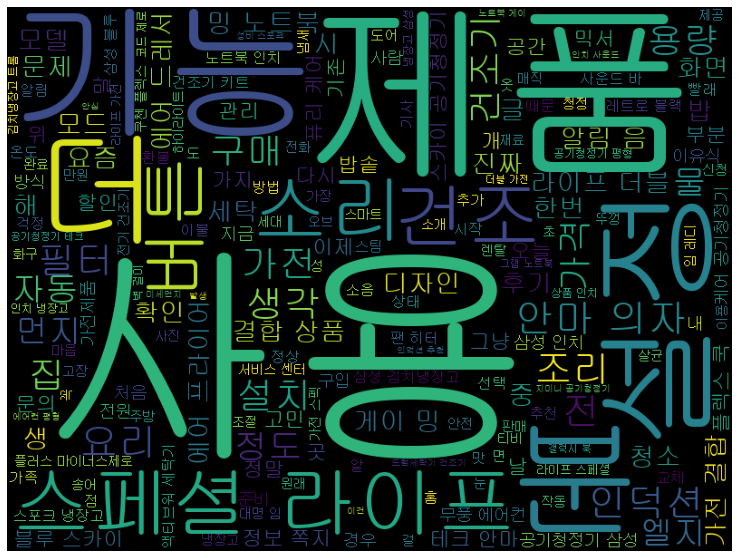

In [82]:
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [83]:
word01 = " ".join(df['doc_n_str_nouns_str'])                

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
wc = WordCloud(background_color='white', #워드클라우드 배경화면 하얀색
              width=1020, height=680, #너비랑 높이 지정
              font_path=font_path+'malgun.ttf', #글씨체 한글로 해야함
               max_font_size=120 #제일 큰 폰트 사이즈 지정
              ,max_words=100, #표시될 단어의 갯수 
               # stopwords=set(['스피커']) #불용어 지정
              ).generate(word01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 1019.5, 679.5, -0.5)

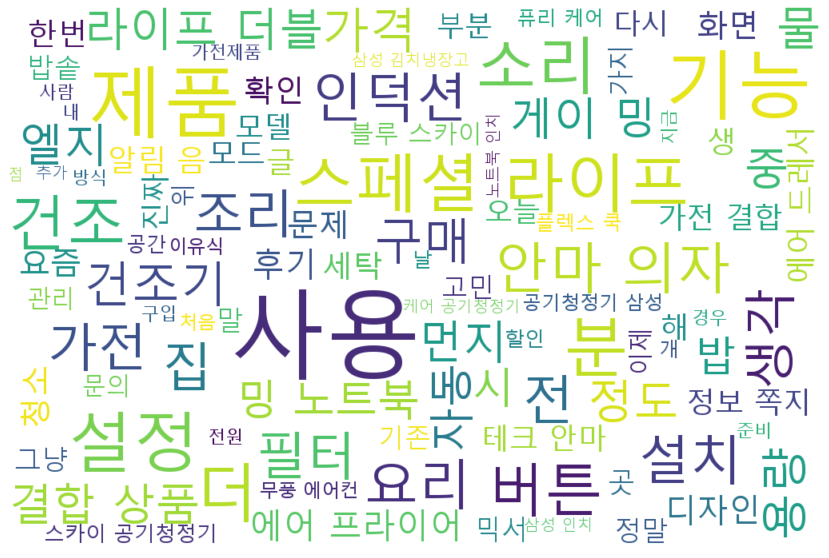

In [86]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear',cmap='YlOrBr')
plt.axis('off')